# Training PAL Algorithm

Set algorithm parameters

In [11]:
algorithm = 'PAL' # 'PAL' or 'MAL'

# maze parameters
maze_width = 101
maze_height = 51

# agent parameters
gamma = 0.995 # discount factor to compute expected cumulative reward
alpha = 0.01 # learning rate for policy improvment

# training parameters
n_environments = 5 # number of different environments to train on
max_iterations_per_environment = 10
n_episodes_per_iteration = 3 # number of episodes to run for each epoch
max_epochs_per_episode = 1000
learning_rate = 0.1
epsilon = 0.1 # epsilon for epsilon-greedy policy

Start training

In [12]:
from train import main

main(
    algorithm=algorithm,
    learning_rate=learning_rate, 
    n_environments=n_environments,
    max_iterations_per_environment=max_iterations_per_environment,
    n_episodes_per_iteration=n_episodes_per_iteration, 
    max_epochs_per_episode=max_epochs_per_episode, 
    maze_width=maze_width, 
    maze_height=maze_height, 
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon,
    verbose=True
)


Initialize maze
Maze created
Maze size: 101x51
Compute initial and terminal state
Initial state: (99, 1)
Compute prior and transitional distribuitions
Compute reward function
Environment created
Agents initialized
Training started

Training on environment 1/5

Iteration 1/10 for environment 1
Collected 3 episodes
Model optimized and policy improved
Stackelberg-Nash equilibrium not reached

Iteration 2/10 for environment 1
Collected 3 episodes
Model optimized and policy improved
Stackelberg-Nash equilibrium not reached

Iteration 3/10 for environment 1
Collected 3 episodes
Model optimized and policy improved
Stackelberg-Nash equilibrium not reached

Iteration 4/10 for environment 1
Collected 3 episodes
Model optimized and policy improved
Stackelberg-Nash equilibrium not reached

Iteration 5/10 for environment 1
Collected 3 episodes
Model optimized and policy improved
Stackelberg-Nash equilibrium not reached

Iteration 6/10 for environment 1
Collected 3 episodes
Model optimized and poli

TypeError: 'int' object is not iterable

Plot metrics

In [6]:
import matplotlib.pyplot as plt

def plot_metrics(mse, cost_function, algorithm, i):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    ax[0].plot(mse)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('MSE')
    ax[0].set_title(f'MSE for {algorithm} for environment {i}')

    ax[1].plot(cost_function, 'r')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Cost function')
    ax[1].set_title(f'Cost function for {algorithm} for environment {i}')

    plt.show()

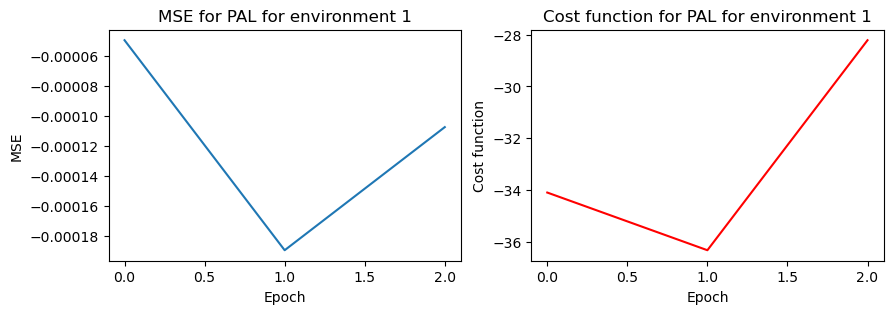

No metrics to plot for environment 2 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 3 only one iteration done
MSE: []
Cost function: []


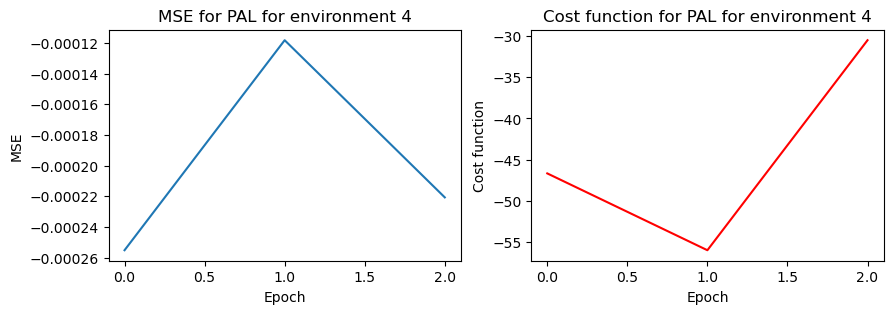

No metrics to plot for environment 5 only one iteration done
MSE: []
Cost function: []


In [7]:
import json
FOLDER = 'training_parameters/PAL/metrics'

all_cost_function = []
all_mse = []

for i in range(n_environments):
    PATH = FOLDER + '/metrics_env_' + str(i+1) + '.json'
    with open(PATH, 'r') as f:
        metrics = json.load(f)
    mse = metrics['mse']
    cost_function = metrics['cost_function']

    for j in mse:
        all_mse.append(j)
    for j in cost_function:
        all_cost_function.append(j)
        
    if len(mse) > 1:
        plot_metrics(mse, cost_function, algorithm, i+1)
    else:
        print(f'No metrics to plot for environment {i+1} only one iteration done')
        print('MSE:', mse)
        print('Cost function:', cost_function)


In [8]:
def plot_policy(policy, algorithm, i):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(policy)
    ax.set_title(f'Policy for {algorithm} for environment {i}')
    plt.show()

def plot_mse(mse, algorithm):
    plt.figure(figsize=(10, 5))
    plt.plot(mse)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(f'MSE for {algorithm}')
    plt.show

def plot_cost_function(cost_function, algorithm):
    plt.figure(figsize=(10, 5))
    plt.plot(cost_function, 'r')
    plt.xlabel('Epoch')
    plt.ylabel('Cost function')
    plt.title(f'Cost function for {algorithm}')
    plt.show()

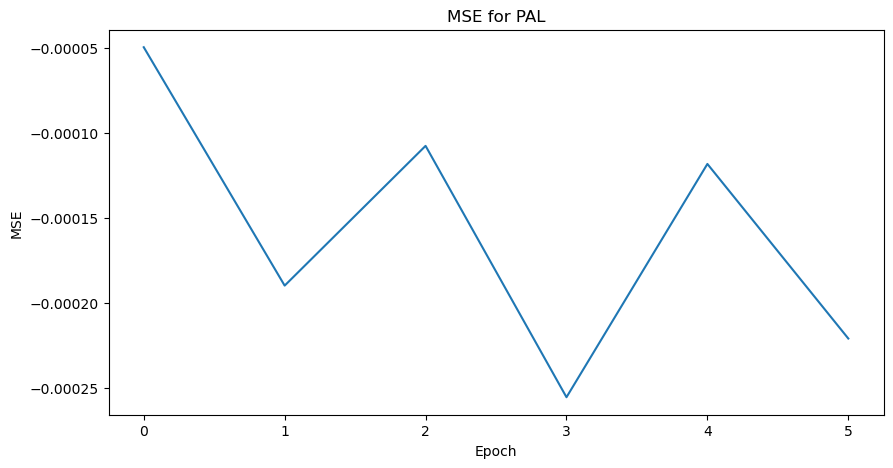

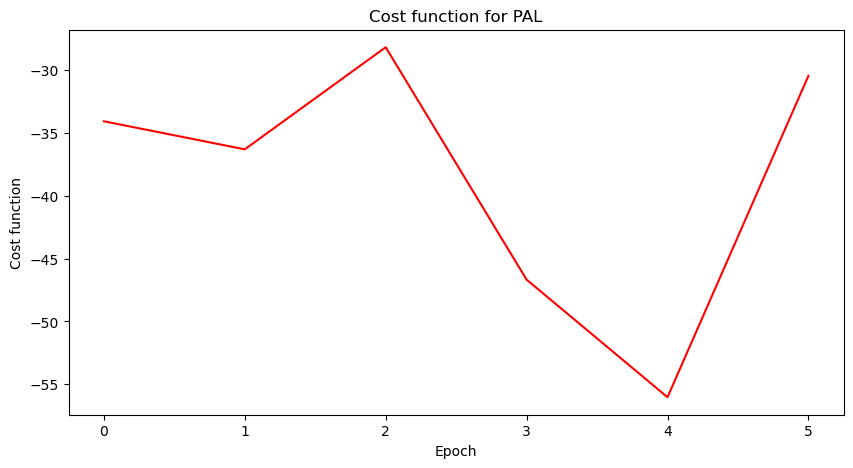

In [9]:
plot_mse(all_mse, algorithm)
plot_cost_function(all_cost_function, algorithm)

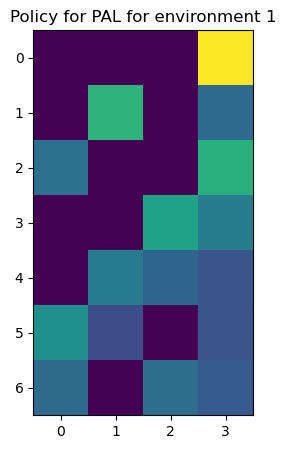

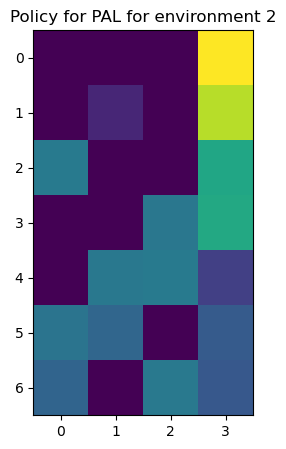

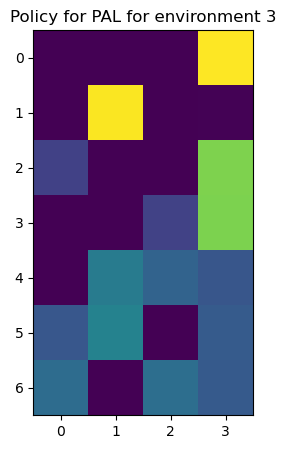

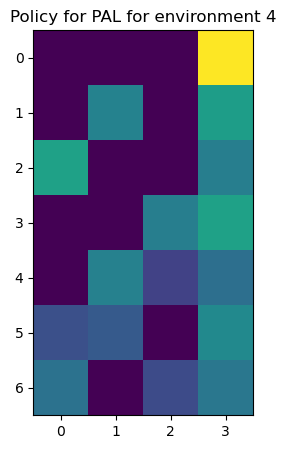

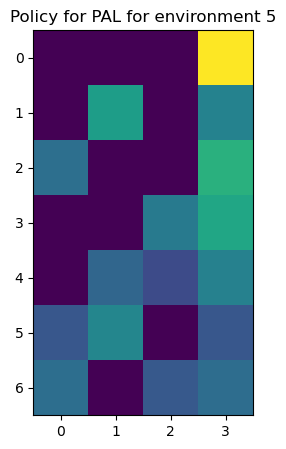

In [10]:
FOLDER = 'training_parameters/PAL/policy'

for i in range(n_environments):
    PATH = FOLDER + '/policy_env_' + str(i) + '.json'
    with open(PATH, 'r') as f:
        policy = json.load(f)
    
    plot_policy(policy, algorithm, i+1)